<a href="https://colab.research.google.com/github/umar0921/Practice/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [6]:
df = df.drop("customerID", axis = 1)

In [7]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [8]:
df_cont = df[["tenure", "MonthlyCharges", "TotalCharges"]]
df_cont

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [9]:
df_cat = df.drop(["Churn", "tenure", "MonthlyCharges", "TotalCharges"], axis = 1)

In [10]:
y = df["Churn"]

In [11]:
X = df.drop("Churn", axis = 1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state= 42)

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)

In [15]:
df_cat_train = X_train[df_cat.columns]
enc_cat_train = pd.DataFrame(enc.fit_transform(df_cat_train))
enc_cat_train.index = X_train.index
df_num_train = X_train.drop(df_cat_train, axis = 1)
X_train = pd.concat([df_num_train, enc_cat_train], axis = 1)

In [16]:
df_cat_valid = X_valid[df_cat.columns]
enc_cat_valid = pd.DataFrame(enc.transform(df_cat_valid))
enc_cat_valid.index = X_valid.index
df_num_valid = X_valid.drop(df_cat_valid, axis = 1)
X_valid = pd.concat([df_num_valid, enc_cat_valid], axis = 1)

In [17]:
y_train = y_train.astype('str')
y_valid = y_valid.astype('str')
y_train = y_train.replace({"Yes": 1, "No": 0}) 
y_valid = y_valid.replace({"Yes": 1, "No": 0}) 

In [18]:
X_train.shape

(5634, 46)

In [19]:
y_train.shape

(5634,)

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [21]:
model = keras.Sequential([
    keras.layers.Dense(32, input_shape = (46,), activation = "relu"),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(1, activation = "sigmoid")
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'] )

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
177/177 [==============================] - 2s 4ms/step - loss: 14.8414 - accuracy: 0.6810
Epoch 2/100
177/177 [==============================] - 1s 4ms/step - loss: 1.5625 - accuracy: 0.7155
Epoch 3/100
177/177 [==============================] - 1s 4ms/step - loss: 1.3776 - accuracy: 0.7203
Epoch 4/100
177/177 [==============================] - 1s 4ms/step - loss: 0.9673 - accuracy: 0.7472
Epoch 5/100
177/177 [==============================] - 1s 4ms/step - loss: 1.1046 - accuracy: 0.7387
Epoch 6/100
177/177 [==============================] - 1s 4ms/step - loss: 1.0584 - accuracy: 0.7471
Epoch 7/100
177/177 [==============================] - 1s 4ms/step - loss: 1.2326 - accuracy: 0.7394
Epoch 8/100
177/177 [==============================] - 1s 4ms/step - loss: 1.3765 - accuracy: 0.7472
Epoch 9/100
177/177 [==============================] - 1s 4ms/step - loss: 0.6995 - accuracy: 0.7583
Epoch 10/100
177/177 [==============================] - 1s 4ms/step - loss: 0.6603 - accur

In [22]:
y_predicted = model.predict(X_valid)

In [23]:
y_pred = []
for element in y_predicted:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1036
           1       0.58      0.70      0.64       373

    accuracy                           0.79      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.81      0.79      0.79      1409



Text(51.0, 0.5, 'Truth')

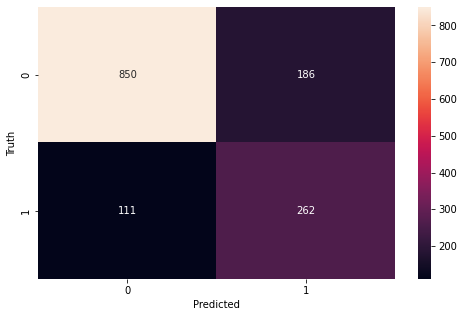

In [25]:
import matplotlib.pyplot as plt
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_valid, predictions = y_pred)
plt.figure(figsize = (8,5))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')